In [6]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = [
'Class label',
'Alcohol ',
'Malic acid ',
'Ash ',
'Alcalinity of ash',
'Magnesium' ,
'Total phenols ',
'Flavanoids ',
'Nonflavanoid phenols ',
'Proanthocyanins' ,
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline'
]

In [7]:
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

/home/quoniam/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1.标准化

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# 2. (1)计算数据集协方差矩阵的特征向量和特征值

In [9]:
import numpy as np

cov_mat = np.cov(X_train_std.T)

In [10]:
cov_mat

array([[ 1.00813008,  0.08797701,  0.23066952, -0.32868099,  0.2141631 ,
         0.35576761,  0.2991246 , -0.16913744,  0.09649074,  0.56962271,
        -0.04781543,  0.07403492,  0.63277882],
       [ 0.08797701,  1.00813008,  0.2016416 ,  0.30658143, -0.06030917,
        -0.30124242, -0.41221162,  0.36616593, -0.19190146,  0.30749173,
        -0.54992807, -0.39352761, -0.20253906],
       [ 0.23066952,  0.2016416 ,  1.00813008,  0.44971971,  0.18321413,
         0.12235533,  0.06130256,  0.18655693, -0.02607834,  0.24555355,
        -0.10928021, -0.01820002,  0.15948032],
       [-0.32868099,  0.30658143,  0.44971971,  1.00813008, -0.08930998,
        -0.37018442, -0.41804463,  0.40212108, -0.25765667, -0.03090225,
        -0.25313262, -0.28934372, -0.48504311],
       [ 0.2141631 , -0.06030917,  0.18321413, -0.08930998,  1.00813008,
         0.16513295,  0.14458703, -0.30763563,  0.27228619,  0.1260674 ,
         0.05792599,  0.01596134,  0.31461066],
       [ 0.35576761, -0.301242

In [11]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [13]:
print('\n 协方差矩阵的特征值: \n\n%s' % eigen_vals)


 协方差矩阵的特征值: 

[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


# 2. (2)绘制特征值的方差贡献率(variance explained ratios)图像

In [15]:
tot = sum(eigen_vals)
tot

13.105691056910587

In [17]:
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
var_exp

[0.37329647723490722,
 0.18818926106599562,
 0.10896790724757788,
 0.077243894771248614,
 0.064785946018261695,
 0.045920138114781434,
 0.039869355976347061,
 0.025219142607261553,
 0.022581806817679659,
 0.018309244719526881,
 0.016353362655051436,
 0.012842705837492707,
 0.0064207569338683062]

In [25]:
cum_var_sum = np.cumsum(var_exp)
cum_var_sum

array([ 0.37329648,  0.56148574,  0.67045365,  0.74769754,  0.81248349,
        0.85840362,  0.89827298,  0.92349212,  0.94607393,  0.96438317,
        0.98073654,  0.99357924,  1.        ])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

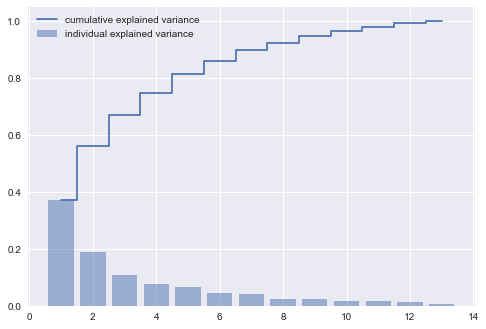

In [31]:
plt.bar(range(1, 14), var_exp, alpha=.5, align='center', label="individual explained variance")
plt.step(range(1, 14), cum_var_sum, where='mid', label="cumulative explained variance")
plt.legend(loc='upper left')
plt.show()

# 3.特征转换

In [53]:
eigens_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigens_pairs.sort(reverse=True)
eigens_pairs

[(4.89230830327375,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592306,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048437,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044954,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.84906459334502427,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543,

In [54]:
# 13 x 2 的映射矩阵 w
w = np.hstack((eigens_pairs[0][1][:, np.newaxis],
eigens_pairs[1][1][:, np.newaxis]))
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [55]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [56]:
X_train_pca = X_train_std.dot(w)
# 124 x 2
X_train_pca

array([[ 2.59891628,  0.00484089],
       [ 0.15819134, -2.26659577],
       [-2.6372337 ,  2.66488569],
       [-2.52848449,  0.51846618],
       [ 1.70922581, -0.91719459],
       [-2.83057003,  0.41936129],
       [-2.82251879,  1.99763147],
       [ 1.36618015,  0.04639099],
       [-2.46584868, -0.07932269],
       [-2.28554906, -0.40096658],
       [ 1.14246632, -2.39587633],
       [-2.28497881, -1.09274988],
       [-2.52924945,  0.6477328 ],
       [ 0.169245  , -1.1264982 ],
       [ 2.53088166,  1.05798498],
       [-0.71596964, -2.80365836],
       [ 2.46922033, -0.15871191],
       [-0.58044574, -0.69290749],
       [ 0.54583852,  0.41042188],
       [ 3.5604963 ,  1.42561284],
       [ 1.58679826, -1.51260121],
       [ 2.54872139, -0.05280515],
       [-3.59338727,  0.88321901],
       [-1.60406659,  2.40373662],
       [ 1.48668426, -1.40863724],
       [ 0.00830468, -2.04898307],
       [-0.15646658, -2.80278355],
       [-2.39863877,  2.47524175],
       [-3.13549157,

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

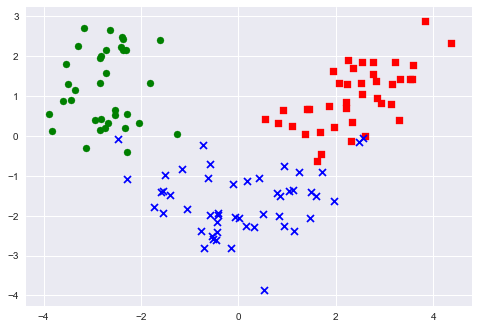

In [58]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
        X_train_pca[y_train == l, 1],
        c=c, label=l, marker=m)
plt.show()

In [59]:
import sys
sys.path.append('../commonLib')

In [60]:
#使用 sklearn 进行 PCA

from sklearn.linear_model import  LogisticRegression
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
import pdr

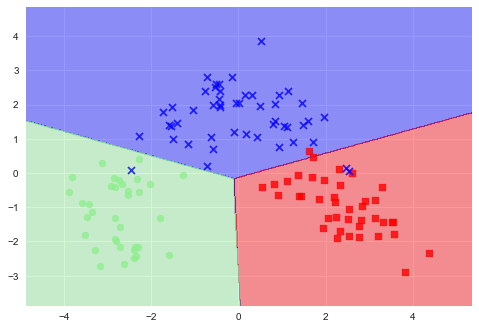

In [66]:
pdr.plot_decision_regions(X_train_pca, y_train, classifier=lr)
# plt.legend(loc='upper left')
plt.show()

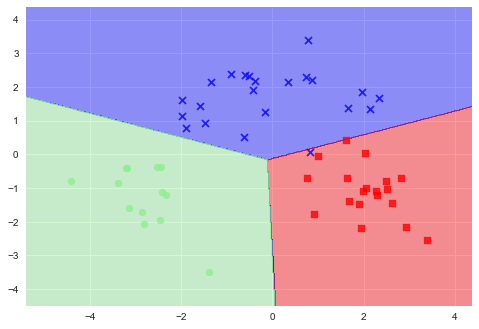

In [67]:
pdr.plot_decision_regions(X_test_pca, y_test, classifier=lr)
# plt.legend(loc='upper left')
plt.show()

# 如何使用 sklearn 计算方差贡献率

In [68]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)

In [70]:
X_train_pca.shape

(124, 13)

In [71]:
pca.explained_variance_

array([ 4.8528542 ,  2.44646039,  1.41658279,  1.00417063,  0.8422173 ,
        0.5969618 ,  0.51830163,  0.32784885,  0.29356349,  0.23802018,
        0.21259371,  0.16695518,  0.08346984])

In [72]:
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])